Реализовать оптимизацию методом градиентного спуска для x^2(np.sin(0,5_x)^2+1). Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов? Подробные условия смотрите в .ipynb файле, приложенном к материалам.

Градиент - это функция н-мерных векторов из частных производных. Градиент задает направление роста функции.

In [328]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

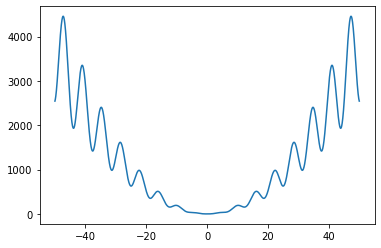

In [329]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

In [350]:
def calculate_grad(_x): return (_x*2)*(np.sin(0.5*_x)**2) + (_x**2) * np.sin(0.5*_x) * np.cos(0.5*_x) + (_x*2)
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta) 

print(calculate_grad(15))
print(calculate_grad2(func2, 15))

129.55270071055799
129.5509441796156


In [351]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
            #Здесь градиент может быть вычеслен без поиска производной функции, 
            #а с учетом значения производной функции в точке, которое найдено по определению производной (calculate_grad2).
            #Но вычеслена производая сложной функции (calculate_grad)
        return x0
    

start_point = 30
alpha=0.08163745294542424
opt1=optimizer(alpha, 1000)

x=opt1.fit(func2, calculate_grad, start_point)
print(x, func2(x))

-6.077415404867097e-77 3.6934978003315904e-153


In [352]:
def opt_alpha_func(a): return optimizer(a, 1000).fit(func2, calculate_grad, start_point)
fit_by_different_alpha = [opt_alpha_func(a) for a in np.arange(0.01, 0.070, 0.01)] 

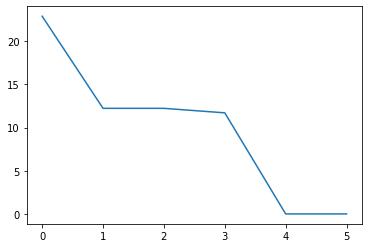

In [353]:
plt.plot(fit_by_different_alpha)
plt.show()

Методом градиентного спуска найдем оптимальный параметр альфа для оптимизации функции x^2(np.sin(0,5_x)^2+1). :)

In [354]:
start_point_alfa = 0.1
alpha_random=0.01
opt2=optimizer(alpha_random, 10)

x2=opt2.fit(opt_alpha_func, calculate_grad, start_point_alfa)
opt_alpha_x2 = opt_alpha_func(x2)
result = func2(opt_alpha_x2)
print(f"Оптимальный альфа для поиска min {x2}. ", f"Точка min {opt_alpha_x2}. ", f"Значение функциии x^2(np.sin(0,5_x)^2+1) в min {result}.")

Оптимальный альфа для поиска min 0.08163745294542424.  Точка min -6.077415404867097e-77.  Значение функциии x^2(np.sin(0,5_x)^2+1) в min 3.6934978003315904e-153.


Количество итераций вибирается обратнопропорционально значению шага. 